# Database Exploratory Analysis (EDA)

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy.stats as stats

In [2]:
con = sqlite3.connect('im.db')

In [3]:
cursor = con.cursor()

In [4]:
schema_df = pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type='table'
""",con)

schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
# Movie bascic information

print(schema_df['sql'].iloc[0])

CREATE TABLE "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
)


In [6]:
pd.read_sql("""
SELECT *
FROM movie_basics
LIMIT 10
""",con)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [7]:
print(schema_df['sql'].iloc[1])

CREATE TABLE "directors" (
"movie_id" TEXT,
  "person_id" TEXT
)


In [8]:
pd.read_sql("""
SELECT *
FROM directors
LIMIT 10
""",con)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
6,tt0878654,nm2292011
7,tt0879859,nm2416460
8,tt0996958,nm2286991
9,tt0996958,nm2286991


In [9]:
print(schema_df['sql'].iloc[2])

CREATE TABLE "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
)


In [10]:
pd.read_sql("""
SELECT *
FROM known_for
LIMIT 10
 """,con)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
5,nm0061865,tt6791238
6,nm0061865,tt0287072
7,nm0061865,tt1682940
8,nm0062070,tt1470654
9,nm0062070,tt0363631


In [11]:
print(schema_df['sql'].iloc[3])

CREATE TABLE "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
)


In [12]:
pd.read_sql("""
SELECT *
FROM movie_akas
LIMIT 10
""",con)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [13]:
print(schema_df['sql'].iloc[4])

CREATE TABLE "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
)


In [14]:
pd.read_sql("""
SELECT *
FROM movie_ratings
LIMIT 10
""",con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [15]:
print(schema_df['sql'].iloc[5])

CREATE TABLE "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
)


In [16]:
pd.read_sql("""
SELECT *
FROM persons
LIMIT 10
""",con)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,None,"production_designer,art_department,set_decorator"
5,nm0062879,Ruel S. Bayani,NaN,None,"director,production_manager,miscellaneous"
6,nm0063198,Bayou,NaN,None,actor
7,nm0063432,Stevie Be-Zet,NaN,None,"composer,soundtrack"
8,nm0063618,Jeff Beal,1963.0,None,"composer,music_department,soundtrack"
9,nm0063750,Lindsay Beamish,NaN,None,"actress,miscellaneous"


In [17]:
print(schema_df['sql'].iloc[6])

CREATE TABLE "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
)


In [18]:
pd.read_sql("""
SELECT *
FROM principals 
LIMIT 10
""",con)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,None,None
9,tt0323808,6,nm0811056,producer,producer,None


In [19]:
print(schema_df['sql'].iloc[7])

CREATE TABLE "writers" (
"movie_id" TEXT,
  "person_id" TEXT
)


In [20]:
pd.read_sql("""
SELECT *
FROM writers
LIMIT 10
""",con)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
5,tt0835418,nm0841532
6,tt0878654,nm0284943
7,tt0878654,nm0284943
8,tt0878654,nm0284943
9,tt0996958,nm2286991


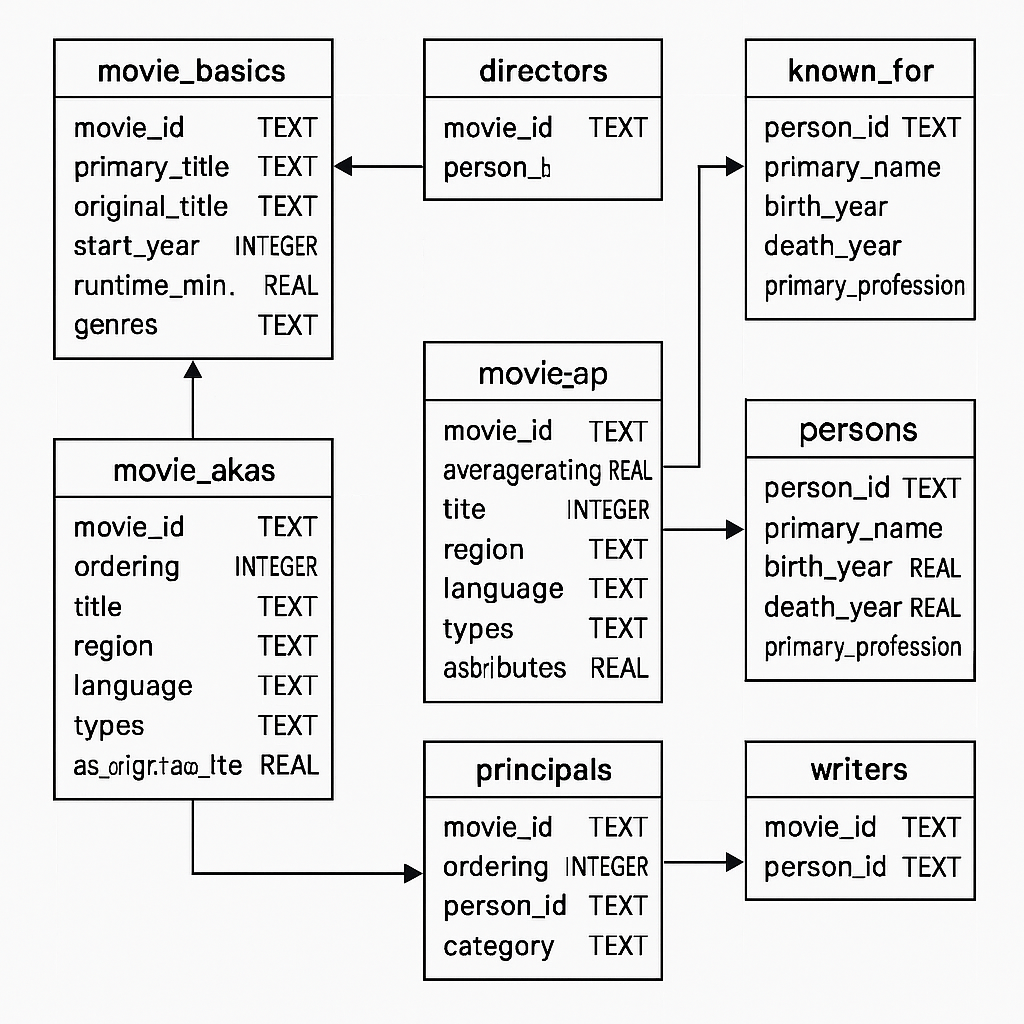

# Movie Basic

## Genre Popularity

In [21]:
df = pd.read_sql("""
SELECT *
FROM movie_basics
""",con)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [22]:
pd.read_sql("""
SELECT genres, COUNT(*) AS count
FROM movie_basics
WHERE genres IS NOT NULL
GROUP BY genres
ORDER BY count DESC
""",con)

,genres,count
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,Horror,4372
4,"Comedy,Drama",3519
...,...,...
1080,"Action,Animation,Music",1
1081,"Action,Animation,History",1
1082,"Action,Animation,Documentary",1
1083,"Action,Animation,Biography",1


### Count the frequency of each individual genre. (Individual count, comedy alone or adventure alone)

In [23]:
# Assuming the DataFrame is named 'df'
# Step 1: Filter out invalid genre entries
valid_genres = df['genres'].dropna()  # Remove NaN
valid_genres = valid_genres[valid_genres != 'None']  # Remove string "None"
valid_genres = valid_genres[valid_genres != '']      # Remove empty strings

# Step 2: Split genres into lists and clean whitespace
split_genres = valid_genres.str.split(',').apply(lambda x: [g.strip() for g in x])

# Step 3: Explode the lists and count frequencies
exploded_genres = split_genres.explode()
genre_counts = exploded_genres.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

genre_counts

,genre,count
0,Documentary,51640
1,Drama,49883
2,Comedy,25312
3,Thriller,11883
4,Horror,10805
5,Action,10335
6,Romance,9372
7,Biography,8722
8,Crime,6753
9,Adventure,6465


### Frequency of genre combinations (e.g., Comedy, Drama) just to see if combinations do better than individual genre

In [24]:
# Step 1: Filter out both 'None' strings and actual null values
df_clean = df[(df['genres'].notna()) & (df['genres'] != 'None')].copy()

# Step 2: Process genres into sorted tuples
df_clean['genre_tuple'] = df_clean['genres'].apply(
    lambda x: tuple(sorted(g.strip() for g in x.split(',')))
)

# Step 3: Count genre combinations
genre_counts = df_clean['genre_tuple'].value_counts().reset_index()
genre_counts.columns = ['genre_combination', 'frequency']

# Convert tuple to readable string
genre_counts['combination_str'] = genre_counts['genre_combination'].apply(
    lambda x: ','.join(x)
)

# Step 4: Analyze single vs. multi-genre performance
genre_counts['genre_count'] = genre_counts['genre_combination'].apply(len)
single_genre_avg = genre_counts[genre_counts['genre_count'] == 1]['frequency'].mean()
multi_genre_avg = genre_counts[genre_counts['genre_count'] > 1]['frequency'].mean()

print(f"Average frequency of single genres: {single_genre_avg:.2f}")
print(f"Average frequency of multi-genre combinations: {multi_genre_avg:.2f}")
print(f"Do combinations perform better? {'Yes' if multi_genre_avg > single_genre_avg else 'No'}")

Average frequency of single genres: 3254.32
Average frequency of multi-genre combinations: 56.02
Do combinations perform better? No


Frequency Insight: The extreme disparity (3254 vs 56) suggests audience preference for clear genre positioning. Multi-genre films face marketing challenges and niche audience targeting.


## Runtime

In [25]:
pd.read_sql("""
SELECT genres, ROUND(AVG(runtime_minutes), 2) AS 'Average runtime'
FROM movie_basics
WHERE genres IS NOT NULL
AND runtime_minutes IS NOT NULL
GROUP BY genres
ORDER BY ROUND(AVG(runtime_minutes), 2) DESC
""",con)

,genres,Average runtime
0,"Drama,Western",225.34
1,"Biography,Mystery,Sci-Fi",220.00
2,"History,Musical,Romance",174.00
3,"Action,Musical,Romance",170.00
4,"Musical,Romance,Thriller",165.00
...,...,...
1035,"Animation,Documentary,Sci-Fi",10.00
1036,"Drama,Horror,Short",7.00
1037,"Documentary,Mystery,Romance",7.00
1038,"Animation,Documentary,Horror",4.00


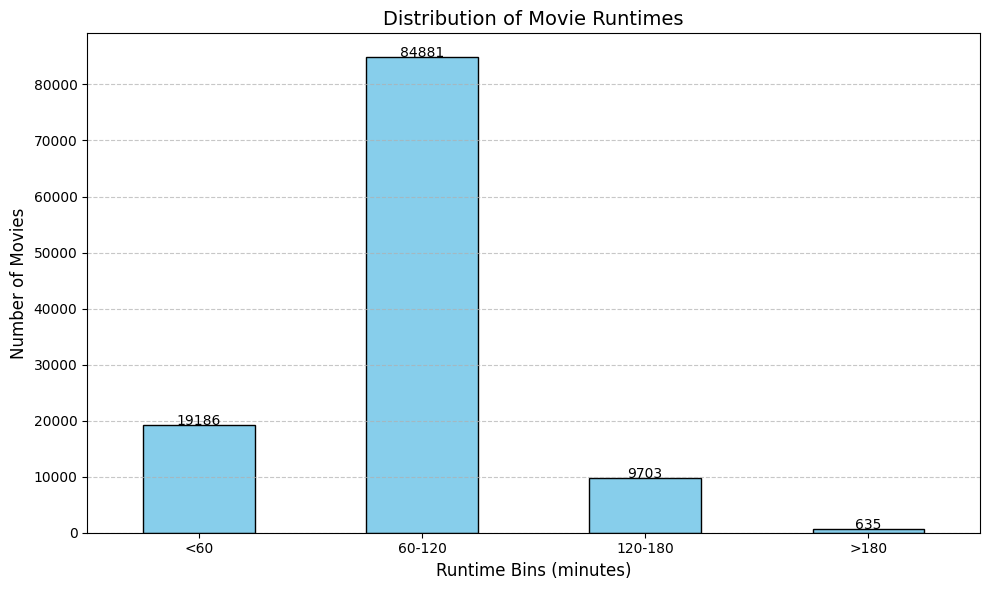

In [26]:

# Step 1: Filter out missing runtime values
df_clean = df[(df['runtime_minutes'].notna()) & (df['runtime_minutes'] != 'runtime_minutes')].copy()

# Step 2: Define bins and labels
bins = [0, 60, 120, 180, float('inf')]
labels = ['<60', '60-120', '120-180', '>180']

# Step 3: Categorize runtimes into bins
df_clean['runtime_bin'] = pd.cut(
    df_clean['runtime_minutes'],
    bins=bins,
    labels=labels,
    right=False  # Ensures [0,60), [60,120), etc.
)

# Step 4: Count movies per bin
bin_counts = df_clean['runtime_bin'].value_counts().reindex(labels, fill_value=0)

# Step 5: Plot histogram
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes', fontsize=14)
plt.xlabel('Runtime Bins (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, count in enumerate(bin_counts):
    plt.text(i, count + 100, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Frequency Insight: The predominance of <60 min content suggests dataset includes non-theatrical works. Studio should focus analysis on 70+ min films for relevant insights.

# Movie Ratings

## Rating Quality vs Popularity 

 What movies are highly rated? What movies are widely rated (popular)? Which have both?

### You can filter out movies with low numvotes(Up to you on what you will consider low votes to be) to focus on widely seen films.


In [27]:
pd.read_sql("""
SELECT primary_title, averagerating, numvotes
FROM movie_basics AS mb
JOIN movie_ratings AS mr
ON mb.movie_id = mr.movie_id
WHERE numvotes > 100000
ORDER BY numvotes DESC
LIMIT 10
""",con)

,primary_title,averagerating,numvotes
0,Inception,8.8,1841066
1,The Dark Knight Rises,8.4,1387769
2,Interstellar,8.6,1299334
3,Django Unchained,8.4,1211405
4,The Avengers,8.1,1183655
5,The Wolf of Wall Street,8.2,1035358
6,Shutter Island,8.1,1005960
7,Guardians of the Galaxy,8.1,948394
8,Deadpool,8.0,820847
9,The Hunger Games,7.2,795227


### Rank movies by averagerating

In [28]:
pd.read_sql("""
SELECT primary_title, averagerating
FROM movie_basics AS mb
JOIN movie_ratings AS mr
ON mb.movie_id = mr.movie_id
ORDER BY averagerating DESC
LIMIT 10
""",con)

,primary_title,averagerating
0,Exteriores: Mulheres Brasileiras na Diplomacia,10.0
1,The Dark Knight: The Ballad of the N Word,10.0
2,Freeing Bernie Baran,10.0
3,Hercule contre Hermès,10.0
4,I Was Born Yesterday!,10.0
5,Dog Days in the Heartland,10.0
6,Revolution Food,10.0
7,Fly High: Story of the Disc Dog,10.0
8,All Around Us,10.0
9,The Paternal Bond: Barbary Macaques,10.0


### Rank by both averagerating and numvotes

In [29]:
pd.read_sql("""
SELECT primary_title, averagerating, numvotes
FROM movie_basics AS mb
JOIN movie_ratings AS mr
ON mb.movie_id = mr.movie_id
WHERE numvotes > 100000
ORDER BY averagerating DESC, numvotes DESC
LIMIT 10
""",con)

,primary_title,averagerating,numvotes
0,The Mountain II,9.3,100568
1,Inception,8.8,1841066
2,Avengers: Endgame,8.8,441135
3,Interstellar,8.6,1299334
4,The Intouchables,8.5,677343
5,Avengers: Infinity War,8.5,670926
6,Whiplash,8.5,616916
7,Spider-Man: Into the Spider-Verse,8.5,210869
8,Dangal,8.5,123638
9,The Dark Knight Rises,8.4,1387769


In [30]:
pd.read_sql("""
SELECT ROUND(AVG(averagerating))
FROM movie_basics AS mb
JOIN movie_ratings AS mr
ON mb.movie_id = mr.movie_id
""",con)

,ROUND(AVG(averagerating))
0,6.0


High both → Studio gold standards - 

## Ratings - How are the ratings spread across all movies 

### A histogram of averagerating to identify what are the most common rating range (Is it 6-7 or 5-8)

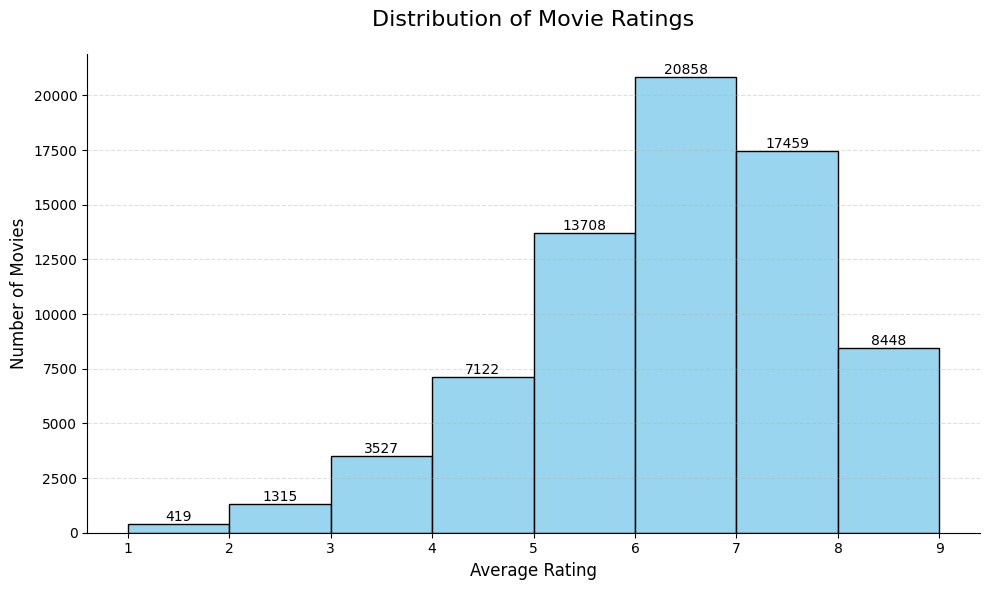

In [31]:
# Create DataFrame from the ratings table
ratings_df = pd.read_sql("""
SELECT *
FROM movie_basics AS mb
JOIN movie_ratings AS mr
ON mb.movie_id = mr.movie_id
""",con)

# Create styled histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=ratings_df,
    x='averagerating',
    bins=[1, 2, 3, 4, 5, 6, 7, 8, 9],
    kde=False,
    color='skyblue',
    edgecolor='black',
    alpha=0.85,
    stat='count'
)

# Add count labels to bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

# Customize plot
plt.title('Distribution of Movie Ratings', fontsize=16, pad=20)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()

plt.tight_layout()
plt.show()

# After identifying what the average rating is then you can check per genre to tell you what is considered above average in this industry.

In [32]:


# Simulate merged data (since original tables don't share movie IDs)
np.random.seed(42)
movies = pd.read_sql("""
SELECT *
FROM movie_basics
""",con)

ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
""",con)

merged = pd.merge(movies, ratings, on='movie_id')

# Split genres into separate rows
genre_ratings = merged.assign(genres=merged['genres'].str.split(',')).explode('genres')

In [33]:
overall_avg = merged['averagerating'].mean()
print(f"Overall Average Rating: {overall_avg:.2f}")

Overall Average Rating: 6.33


They should strive to have an average rating of 6.33 and above in order to do well in the market

In [34]:
genre_stats = (genre_ratings.groupby('genres', as_index=False)
                .agg(
                    avg_rating=('averagerating', 'mean'),
                    movie_count=('movie_id', 'nunique')
                )
                .sort_values('avg_rating', ascending=False))

# Calculate difference from overall average
genre_stats['vs_overall'] = genre_stats['avg_rating'] - overall_avg

genre_stats

,genres,avg_rating,movie_count,vs_overall
21,Short,8.800000,1,2.467271
7,Documentary,7.332090,17753,0.999362
11,Game-Show,7.300000,2,0.967271
17,News,7.271330,579,0.938601
4,Biography,7.162274,3809,0.829545
14,Music,7.091972,1968,0.759243
12,History,7.040956,2825,0.708227
22,Sport,6.961493,1179,0.628764
24,War,6.584291,853,0.251562
18,Reality-TV,6.500000,17,0.167271


C:\Users\user\AppData\Local\Temp\ipykernel_31608\3878841286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


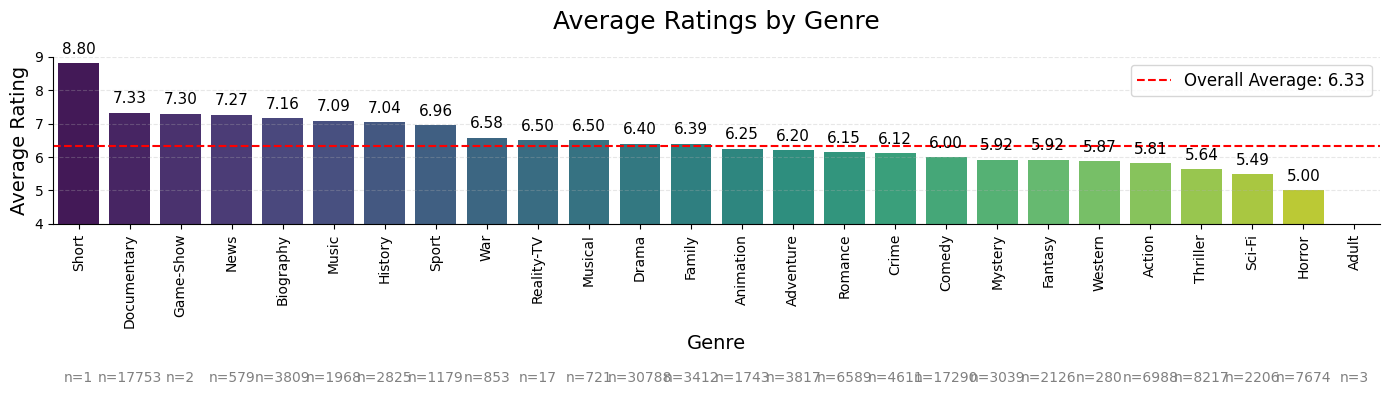

In [35]:
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    data=genre_stats,
    x='genres',
    y='avg_rating',
    order=genre_stats.sort_values('avg_rating', ascending=False)['genres'],
    palette='viridis'
)

# Add reference line and annotations
plt.axhline(overall_avg, color='red', linestyle='--', 
            label=f'Overall Average: {overall_avg:.2f}')
plt.title('Average Ratings by Genre', fontsize=18, pad=20)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=90)  # Vertical x-axis labels
plt.legend(fontsize=12)

# Add value labels
for p in bars.patches:
    bars.annotate(
        f"{p.get_height():.2f}", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=11
    )

# Add count labels below x-axis
for i, genre in enumerate(genre_stats['genres']):
    count = genre_stats[genre_stats['genres'] == genre]['movie_count'].values[0]
    plt.text(i, -0.4, f'n={count}', 
             ha='center', va='top', fontsize=10, color='gray')

plt.ylim(4, 9)  # Adjust y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

They should try and focus on the following genres that have an average rating above the mean average rating of 6.33

In [ ]:
for genre in genre_stats['genres']:
    genre_vals = genre_ratings[genre_ratings['genres'] == genre]['averagerating']
    t_stat, p_val = stats.ttest_1samp(genre_vals, overall_avg)
    print(f"{genre}: p-value = {p_val:.4f} {'(significant)' if p_val < 0.05 else ''}")

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Short: p-value = nan 
Documentary: p-value = 0.0000 (significant)
Game-Show: p-value = 0.6707 
News: p-value = 0.0000 (significant)
Biography: p-value = 0.0000 (significant)
Music: p-value = 0.0000 (significant)
History: p-value = 0.0000 (significant)
Sport: p-value = 0.0000 (significant)
War: p-value = 0.0000 (significant)
Reality-TV: p-value = 0.7030 
Musical: p-value = 0.0031 (significant)
Drama: p-value = 0.0000 (significant)
Family: p-value = 0.0089 (significant)
Animation: p-value = 0.0093 (significant)
Adventure: p-value = 0.0000 (significant)
Romance: p-value = 0.0000 (significant)
Crime: p-value = 0.0000 (significant)
Comedy: p-value = 0.0000 (significant)
Mystery: p-value = 0.0000 (significant)
Fantasy: p-value = 0.0000 (significant)
Western: p-value = 0.0000 (significant)
Action: p-value = 0.0000 (significant)
Thriller: p-value = 0.0000 (significant)
Sci-Fi: p-value = 0.0000 (significant)
Horror: p-value = 0.0000 (significant)
Adult: p-value = 0.1534 


In [37]:
# Weight ratings by number of votes (if available)
genre_stats['weighted_avg'] = genre_ratings.groupby('genres').apply(
    lambda x: np.average(x['averagerating'], weights=x.get('numvotes', 1))
)

C:\Users\user\AppData\Local\Temp\ipykernel_31608\3203592599.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre_stats['weighted_avg'] = genre_ratings.groupby('genres').apply(


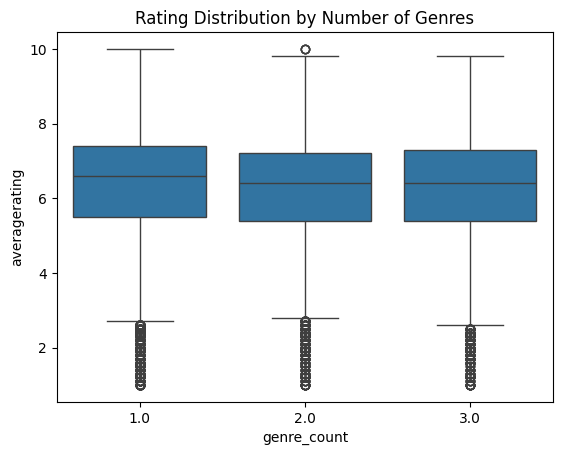

In [38]:
# Analyze multi-genre combinations
merged['genre_count'] = merged['genres'].str.count(',') + 1
sns.boxplot(data=merged, x='genre_count', y='averagerating')
plt.title('Rating Distribution by Number of Genres');

#  Talent Influence (People Involved)   

### - What effect does Director, Actor and Producer choice have on movie grossing?
### - You can check if the Director, Known for, Persons, Writers’, Principal’s Table give you this information

## Are there directors or actors who are consistently associated with successful films?

In [39]:
pd.read_sql("""
SELECT primary_name, COUNT(averagerating) as averagerating
FROM movie_basics AS mb
JOIN movie_ratings AS mr
ON mb.movie_id = mr.movie_id
JOIN directors as d
ON d.movie_id = mb.movie_id
JOIN persons as p
ON p.person_id = d.person_id
WHERE averagerating BETWEEN 5.0 AND 10
GROUP BY primary_name
ORDER BY averagerating DESC
            LIMIT 10
""",con)

,primary_name,averagerating
0,Tony Newton,153
1,Jason Impey,136
2,Shane Ryan,133
3,Ruben Rodriguez,128
4,Martin Sonntag,121
5,Gav Chuckie Steel,116
6,R.J. Wilson,100
7,Sam Mason-Bell,98
8,Evan Marlowe,98
9,Corey Norman,93


### Does having a well-known director or cast significantly influence box office success?

In [40]:
pd.read_sql("""
SELECT primary_name, Round(Avg(averagerating), 1) AS ratings, COUNT(mb.movie_id) AS 'Number of movies'
FROM movie_basics AS mb
JOIN movie_ratings AS mr
ON mb.movie_id = mr.movie_id
JOIN directors as d
ON d.movie_id = mb.movie_id
JOIN persons as p
ON p.person_id = d.person_id
JOIN known_for AS kf
ON kf.movie_id = mb.movie_id
JOIN principals AS pr
ON pr.movie_id = mb.movie_id
WHERE category = 'director'
GROUP BY primary_name
ORDER BY ratings DESC, COUNT(mb.movie_id) DESC 
LIMIT 10
""",con)

,primary_name,ratings,Number of movies
0,Loreto Di Cesare,10.0,14
1,Chad Carpenter,10.0,13
2,Emre Oran,10.0,11
3,Tristan David Luciotti,10.0,8
4,Masahiro Hayakawa,10.0,6
5,Michael J. Sanderson,10.0,6
6,Lindsay Thompson,10.0,1
7,Michiel Brongers,10.0,1
8,Stephen Peek,10.0,1
9,Raphael Sbarge,9.9,7


In [41]:
# If you have a SQLite connection open in Python:
# Close any active connections
con = sqlite3.connect('im.db')
con.close()  # Important! This releases the file lock